# Importing the libraries needed for the project

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

from sklearn.metrics import roc_curve, plot_roc_curve, auc


from keras_preprocessing import image
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
# used to prepare the image directory and split into train , validate , test for keras
import splitfolders

## loading the images into a tensor flow dataframe object 

In [2]:
# Split with a ratio only done once per project directory 
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.

#image_folder = Path('/food_data/images')

#output_folder = Path('/food_data/output')

#splitfolders.ratio(image_folder, output=output_folder,
    #seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

In [3]:
import PIL

## Creating the traning and test dataframes using keras 


In [4]:
# creatnig the training, testing and validation 
train_df = image_dataset_from_directory(
    directory = 'food_data/veg_fruits/train',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100),
    
    
    )

test_df = image_dataset_from_directory(
    directory = 'food_data/veg_fruits/test',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )

val_df = image_dataset_from_directory(
    directory = 'food_data/veg_fruits/validation',
    labels = 'inferred',
    label_mode = 'categorical',
    seed = 5,
    color_mode="rgb",
    shuffle = True ,
    batch_size = 32 ,
    image_size = (100,100)
    )

train_df

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


2022-04-07 00:13:50.671051: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 351 files belonging to 36 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 36), dtype=tf.float32, name=None))>

## Visualizing the data 


2022-04-07 00:13:51.713259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:13:54.071490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


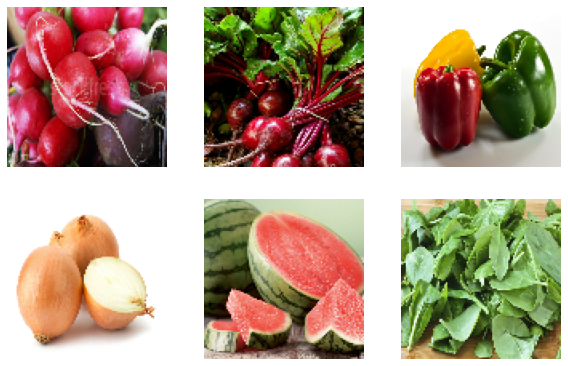

In [5]:
plt.figure(figsize=(10,10))

for image , label in train_df.take(1):
    for i in range(6):
        ax = plt.subplot(3 ,3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        #plt.title(label[i])
        plt.axis('off')

## Define the model architecture

In [6]:
# import model type
model = Sequential()

model.add(Dense(
    160,
    activation='relu',
    input_shape = (100, 100, 3)
))
model.add(Conv2D(
    32,
    (3,3),
    activation='relu',
    
))

model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(
    32,
    (3,3),
    activation='relu'
))

model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(
    160,
    activation='relu'
))

model.add(Dense(
    36,
    activation='softmax'
))

In [7]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer=optimizer , loss='categorical_crossentropy' , metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100, 100, 160)     640       
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        46112     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [9]:
fitting = model.fit(train_df , epochs=100 , batch_size=5)

Epoch 1/100


2022-04-07 00:13:56.057513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:13:58.513517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:40 - loss: 8502.8848 - accuracy: 0.0469

2022-04-07 00:14:01.009013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:33 - loss: 1469896.3750 - accuracy: 0.0521

2022-04-07 00:14:02.225924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:13 - loss: nan - accuracy: 0.0344   

2022-04-07 00:14:17.910631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:14:17.919368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:13 - loss: nan - accuracy: 0.0326

2022-04-07 00:14:21.448439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:14:21.468021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:14:22.068453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:09 - loss: nan - accuracy: 0.0312

2022-04-07 00:14:25.322667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:04 - loss: nan - accuracy: 0.0292

2022-04-07 00:14:29.553538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 59s - loss: nan - accuracy: 0.0270 

2022-04-07 00:14:34.868660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 47s - loss: nan - accuracy: 0.0255

2022-04-07 00:14:46.313228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 41s - loss: nan - accuracy: 0.0240

2022-04-07 00:14:53.687596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0242

2022-04-07 00:14:56.398499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0258

2022-04-07 00:15:01.023284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:15:01.030849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0250

2022-04-07 00:15:03.652519: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 30s - loss: nan - accuracy: 0.0248

2022-04-07 00:15:07.372756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 29s - loss: nan - accuracy: 0.0249

2022-04-07 00:15:08.702069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 22s - loss: nan - accuracy: 0.0235

2022-04-07 00:15:19.886115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0225

2022-04-07 00:15:25.334588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0238

2022-04-07 00:15:27.364942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 106s 1s/step - loss: nan - accuracy: 0.0241
Epoch 2/100


2022-04-07 00:15:41.588200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:15:44.187286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:52 - loss: nan - accuracy: 0.0312

2022-04-07 00:15:46.809891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:45 - loss: nan - accuracy: 0.0312

2022-04-07 00:15:48.101804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:28 - loss: nan - accuracy: 0.0219

2022-04-07 00:16:07.196180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:16:07.205275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:27 - loss: nan - accuracy: 0.0217

2022-04-07 00:16:11.340377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:16:11.346570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:16:12.048722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:21 - loss: nan - accuracy: 0.0220

2022-04-07 00:16:15.416706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:16 - loss: nan - accuracy: 0.0232

2022-04-07 00:16:20.606211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:09 - loss: nan - accuracy: 0.0220

2022-04-07 00:16:26.760856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 54s - loss: nan - accuracy: 0.0210

2022-04-07 00:16:39.461374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 47s - loss: nan - accuracy: 0.0227

2022-04-07 00:16:46.413814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 44s - loss: nan - accuracy: 0.0221

2022-04-07 00:16:49.381779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 38s - loss: nan - accuracy: 0.0203

2022-04-07 00:16:54.393387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:16:54.404996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0212

2022-04-07 00:16:56.581298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 33s - loss: nan - accuracy: 0.0216

2022-04-07 00:17:00.288189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 32s - loss: nan - accuracy: 0.0226

2022-04-07 00:17:01.514727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 23s - loss: nan - accuracy: 0.0223

2022-04-07 00:17:10.791527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 17s - loss: nan - accuracy: 0.0225

2022-04-07 00:17:16.187709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0219

2022-04-07 00:17:18.192282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 110s 1s/step - loss: nan - accuracy: 0.0218
Epoch 3/100


2022-04-07 00:17:31.884513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:17:34.357306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:51 - loss: nan - accuracy: 0.0156

2022-04-07 00:17:36.673313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:40 - loss: nan - accuracy: 0.0104

2022-04-07 00:17:37.859035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:20 - loss: nan - accuracy: 0.0234

2022-04-07 00:17:55.108665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:17:55.112092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:19 - loss: nan - accuracy: 0.0245

2022-04-07 00:17:58.880754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:17:58.890759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:17:59.563041: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:16 - loss: nan - accuracy: 0.0243

2022-04-07 00:18:03.393813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:11 - loss: nan - accuracy: 0.0232

2022-04-07 00:18:08.287124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:05 - loss: nan - accuracy: 0.0220

2022-04-07 00:18:14.027046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 52s - loss: nan - accuracy: 0.0217

2022-04-07 00:18:26.773697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 45s - loss: nan - accuracy: 0.0234

2022-04-07 00:18:34.518837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 43s - loss: nan - accuracy: 0.0232

2022-04-07 00:18:37.518769: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 38s - loss: nan - accuracy: 0.0233

2022-04-07 00:18:42.864779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:18:42.869717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 35s - loss: nan - accuracy: 0.0226

2022-04-07 00:18:45.021754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 32s - loss: nan - accuracy: 0.0225

2022-04-07 00:18:48.508315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 31s - loss: nan - accuracy: 0.0222

2022-04-07 00:18:49.516855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 22s - loss: nan - accuracy: 0.0211

2022-04-07 00:18:58.199455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 17s - loss: nan - accuracy: 0.0213

2022-04-07 00:19:03.571665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0212

2022-04-07 00:19:05.492224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 107s 1s/step - loss: nan - accuracy: 0.0218
Epoch 4/100


2022-04-07 00:19:18.954907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:19:21.507997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:51 - loss: nan - accuracy: 0.0000e+00

2022-04-07 00:19:23.909219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:40 - loss: nan - accuracy: 0.0000e+00

2022-04-07 00:19:25.076729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:19 - loss: nan - accuracy: 0.0219

2022-04-07 00:19:42.125716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:19:42.130848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:18 - loss: nan - accuracy: 0.0217

2022-04-07 00:19:45.780911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:19:45.787029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:19:46.415527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:14 - loss: nan - accuracy: 0.0208

2022-04-07 00:19:49.918445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:09 - loss: nan - accuracy: 0.0242

2022-04-07 00:19:54.434379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:04 - loss: nan - accuracy: 0.0220

2022-04-07 00:20:00.707343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 51s - loss: nan - accuracy: 0.0217

2022-04-07 00:20:13.678569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 44s - loss: nan - accuracy: 0.0212

2022-04-07 00:20:20.739095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 42s - loss: nan - accuracy: 0.0210

2022-04-07 00:20:23.256833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0208

2022-04-07 00:20:28.050863: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:20:28.053056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0212

2022-04-07 00:20:30.362434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 31s - loss: nan - accuracy: 0.0216

2022-04-07 00:20:33.752082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 30s - loss: nan - accuracy: 0.0217

2022-04-07 00:20:34.938947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 22s - loss: nan - accuracy: 0.0215

2022-04-07 00:20:44.976292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 17s - loss: nan - accuracy: 0.0210

2022-04-07 00:20:50.293110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0212

2022-04-07 00:20:52.257782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 107s 1s/step - loss: nan - accuracy: 0.0218
Epoch 5/100


2022-04-07 00:21:06.155347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:21:08.570835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:57 - loss: nan - accuracy: 0.0000e+00

2022-04-07 00:21:11.021600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:51 - loss: nan - accuracy: 0.0104    

2022-04-07 00:21:12.360892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:23 - loss: nan - accuracy: 0.0234

2022-04-07 00:21:30.027628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:21:30.028293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:23 - loss: nan - accuracy: 0.0231

2022-04-07 00:21:34.305095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:21:34.368462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:21:35.130638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:18 - loss: nan - accuracy: 0.0220

2022-04-07 00:21:38.690093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:14 - loss: nan - accuracy: 0.0222

2022-04-07 00:21:43.823809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:08 - loss: nan - accuracy: 0.0220

2022-04-07 00:21:50.067930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 53s - loss: nan - accuracy: 0.0204

2022-04-07 00:22:02.470981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 46s - loss: nan - accuracy: 0.0205

2022-04-07 00:22:09.759879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 43s - loss: nan - accuracy: 0.0210

2022-04-07 00:22:12.360002: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 38s - loss: nan - accuracy: 0.0198

2022-04-07 00:22:17.428991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:22:17.437963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 35s - loss: nan - accuracy: 0.0207

2022-04-07 00:22:19.405677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 32s - loss: nan - accuracy: 0.0211

2022-04-07 00:22:22.584113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 31s - loss: nan - accuracy: 0.0208

2022-04-07 00:22:23.607495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 22s - loss: nan - accuracy: 0.0231

2022-04-07 00:22:32.336625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 17s - loss: nan - accuracy: 0.0225

2022-04-07 00:22:37.887372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0219

2022-04-07 00:22:40.215471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 109s 1s/step - loss: nan - accuracy: 0.0218
Epoch 6/100


2022-04-07 00:22:54.889783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:22:57.503039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:46 - loss: nan - accuracy: 0.0000e+00

2022-04-07 00:22:59.904331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:45 - loss: nan - accuracy: 0.0104    

2022-04-07 00:23:01.256624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:27 - loss: nan - accuracy: 0.0203

2022-04-07 00:23:20.082278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:23:20.088847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:27 - loss: nan - accuracy: 0.0204

2022-04-07 00:23:24.381986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:23:24.387408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:23:25.173790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:23 - loss: nan - accuracy: 0.0197

2022-04-07 00:23:29.210472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:18 - loss: nan - accuracy: 0.0202

2022-04-07 00:23:34.865546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:12 - loss: nan - accuracy: 0.0211

2022-04-07 00:23:41.495089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 58s - loss: nan - accuracy: 0.0204

2022-04-07 00:23:56.166891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 51s - loss: nan - accuracy: 0.0216

2022-04-07 00:24:04.522426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 47s - loss: nan - accuracy: 0.0232

2022-04-07 00:24:07.486873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 42s - loss: nan - accuracy: 0.0218

2022-04-07 00:24:13.337899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:24:13.367773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 39s - loss: nan - accuracy: 0.0216

2022-04-07 00:24:15.788556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 36s - loss: nan - accuracy: 0.0211

2022-04-07 00:24:19.499970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 34s - loss: nan - accuracy: 0.0213

2022-04-07 00:24:20.745463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 25s - loss: nan - accuracy: 0.0203

2022-04-07 00:24:30.190428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 19s - loss: nan - accuracy: 0.0217

2022-04-07 00:24:36.461176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0219

2022-04-07 00:24:39.201803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 121s 1s/step - loss: nan - accuracy: 0.0218
Epoch 7/100


2022-04-07 00:24:55.782522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:24:58.235760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:48 - loss: nan - accuracy: 0.0000e+00

2022-04-07 00:25:00.607578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:39 - loss: nan - accuracy: 0.0000e+00

2022-04-07 00:25:01.809174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 6:40 - loss: nan - accuracy: 0.0148

2022-04-07 00:26:38.655097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:26:38.684569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:42:47 - loss: nan - accuracy: 0.0163

2022-04-07 00:55:08.422496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:55:08.431162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:55:09.207224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 1:31:49 - loss: nan - accuracy: 0.0162

2022-04-07 00:55:11.293641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:09:43 - loss: nan - accuracy: 0.0212

2022-04-07 00:56:12.382579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 53:19 - loss: nan - accuracy: 0.0203

2022-04-07 00:56:29.240760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 32:31 - loss: nan - accuracy: 0.0204

2022-04-07 00:56:51.884452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 25:34 - loss: nan - accuracy: 0.0193

2022-04-07 00:57:07.905329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 23:34 - loss: nan - accuracy: 0.0203

2022-04-07 00:57:13.386254: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 18:18 - loss: nan - accuracy: 0.0213

2022-04-07 00:57:26.287700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:57:26.925075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 16:45 - loss: nan - accuracy: 0.0207

2022-04-07 00:57:31.704912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 14:36 - loss: nan - accuracy: 0.0211

2022-04-07 00:57:37.425767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 13:55 - loss: nan - accuracy: 0.0208

2022-04-07 00:57:38.817393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 9:06 - loss: nan - accuracy: 0.0215

2022-04-07 00:57:56.945861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 6:32 - loss: nan - accuracy: 0.0217

2022-04-07 00:58:08.454359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 5:36 - loss: nan - accuracy: 0.0219

2022-04-07 00:58:12.327798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 2023s 21s/step - loss: nan - accuracy: 0.0218
Epoch 8/100


2022-04-07 00:58:40.255477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:58:47.094073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:24 - loss: nan - accuracy: 0.0312 

2022-04-07 00:58:51.587575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 3:30 - loss: nan - accuracy: 0.0208

2022-04-07 00:58:54.462190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:48 - loss: nan - accuracy: 0.0164

2022-04-07 00:59:27.838377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:59:27.850667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:47 - loss: nan - accuracy: 0.0177

2022-04-07 00:59:38.851005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 00:59:38.917356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:45 - loss: nan - accuracy: 0.0195

2022-04-07 00:59:40.946751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 2:37 - loss: nan - accuracy: 0.0197

2022-04-07 00:59:46.875000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:26 - loss: nan - accuracy: 0.0212

2022-04-07 00:59:55.238959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:14 - loss: nan - accuracy: 0.0220

2022-04-07 01:00:09.914613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 1:49 - loss: nan - accuracy: 0.0210

2022-04-07 01:00:36.252471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:37 - loss: nan - accuracy: 0.0220

2022-04-07 01:00:48.577958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:32 - loss: nan - accuracy: 0.0218

2022-04-07 01:00:52.789135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:21 - loss: nan - accuracy: 0.0220

2022-04-07 01:01:02.899708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 1:18 - loss: nan - accuracy: 0.0222

2022-04-07 01:01:03.455835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:14 - loss: nan - accuracy: 0.0215

2022-04-07 01:01:07.606840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:07 - loss: nan - accuracy: 0.0215

2022-04-07 01:01:13.653185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:01:15.276990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 47s - loss: nan - accuracy: 0.0206

2022-04-07 01:01:32.493415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 36s - loss: nan - accuracy: 0.0208

2022-04-07 01:01:43.474112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 32s - loss: nan - accuracy: 0.0207

2022-04-07 01:01:47.240099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 216s 2s/step - loss: nan - accuracy: 0.0218
Epoch 9/100


2022-04-07 01:02:15.388482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:02:21.007357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:02 - loss: nan - accuracy: 0.0312 

2022-04-07 01:02:25.081433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:44 - loss: nan - accuracy: 0.0208

2022-04-07 01:02:27.115855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:40 - loss: nan - accuracy: 0.0247

2022-04-07 01:02:59.799405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:02:59.822592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:39 - loss: nan - accuracy: 0.0231

2022-04-07 01:03:10.199486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:03:10.225773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:03:12.053750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 2:29 - loss: nan - accuracy: 0.0231

2022-04-07 01:03:17.760181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:20 - loss: nan - accuracy: 0.0222

2022-04-07 01:03:26.624306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:06 - loss: nan - accuracy: 0.0194

2022-04-07 01:03:38.536959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:45 - loss: nan - accuracy: 0.0208

2022-04-07 01:04:04.412469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0197

2022-04-07 01:04:17.306443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:29 - loss: nan - accuracy: 0.0218

2022-04-07 01:04:21.611946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 1:15 - loss: nan - accuracy: 0.0217

2022-04-07 01:04:31.618106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:04:32.317183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:11 - loss: nan - accuracy: 0.0215

2022-04-07 01:04:36.416881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:05 - loss: nan - accuracy: 0.0224

2022-04-07 01:04:42.482979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:02 - loss: nan - accuracy: 0.0225

2022-04-07 01:04:43.822190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0222

2022-04-07 01:05:02.694836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 35s - loss: nan - accuracy: 0.0216

2022-04-07 01:05:13.979179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 31s - loss: nan - accuracy: 0.0215

2022-04-07 01:05:17.588902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 209s 2s/step - loss: nan - accuracy: 0.0218
Epoch 10/100


2022-04-07 01:05:44.170712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:05:49.638135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 2:57 - loss: nan - accuracy: 0.0469 

2022-04-07 01:05:53.570546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:41 - loss: nan - accuracy: 0.0312

2022-04-07 01:05:55.595616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:38 - loss: nan - accuracy: 0.0230

2022-04-07 01:06:27.698054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:06:27.701977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:39 - loss: nan - accuracy: 0.0204

2022-04-07 01:06:38.742609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:06:38.827305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:06:40.634764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:32 - loss: nan - accuracy: 0.0228

2022-04-07 01:06:46.134117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:19 - loss: nan - accuracy: 0.0232

2022-04-07 01:06:53.998927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:05 - loss: nan - accuracy: 0.0228

2022-04-07 01:07:06.162632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:44 - loss: nan - accuracy: 0.0215

2022-04-07 01:07:31.740557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0220

2022-04-07 01:07:45.378385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:29 - loss: nan - accuracy: 0.0212

2022-04-07 01:07:49.677469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:18 - loss: nan - accuracy: 0.0205

2022-04-07 01:08:00.651147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 1:16 - loss: nan - accuracy: 0.0207

2022-04-07 01:08:01.281437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:12 - loss: nan - accuracy: 0.0210

2022-04-07 01:08:05.790441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:05 - loss: nan - accuracy: 0.0205

2022-04-07 01:08:12.271295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:08:13.684779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0218

2022-04-07 01:08:31.827360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 36s - loss: nan - accuracy: 0.0216

2022-04-07 01:08:42.959764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 31s - loss: nan - accuracy: 0.0218

2022-04-07 01:08:46.602849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 209s 2s/step - loss: nan - accuracy: 0.0218
Epoch 11/100


2022-04-07 01:09:13.456798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:09:19.454045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:11 - loss: nan - accuracy: 0.0000e+00 

2022-04-07 01:09:23.733749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:54 - loss: nan - accuracy: 0.0000e+00

2022-04-07 01:09:26.003568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:41 - loss: nan - accuracy: 0.0181

2022-04-07 01:09:58.475162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:09:58.585272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:42 - loss: nan - accuracy: 0.0190

2022-04-07 01:10:09.483971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:10:09.561154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:10:11.401904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 2:32 - loss: nan - accuracy: 0.0185

2022-04-07 01:10:17.379102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:21 - loss: nan - accuracy: 0.0192

2022-04-07 01:10:25.107459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:08 - loss: nan - accuracy: 0.0203

2022-04-07 01:10:37.939633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:47 - loss: nan - accuracy: 0.0202

2022-04-07 01:11:03.839535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:34 - loss: nan - accuracy: 0.0197

2022-04-07 01:11:16.259134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:30 - loss: nan - accuracy: 0.0195

2022-04-07 01:11:20.616332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:19 - loss: nan - accuracy: 0.0215

2022-04-07 01:11:31.143328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:11:31.835842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:14 - loss: nan - accuracy: 0.0213

2022-04-07 01:11:35.907143: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:08 - loss: nan - accuracy: 0.0213

2022-04-07 01:11:42.301480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:06 - loss: nan - accuracy: 0.0215

2022-04-07 01:11:43.668501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0214

2022-04-07 01:12:02.069467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 38s - loss: nan - accuracy: 0.0215

2022-04-07 01:12:12.862704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 34s - loss: nan - accuracy: 0.0217

2022-04-07 01:12:16.435265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 212s 2s/step - loss: nan - accuracy: 0.0218
Epoch 12/100


2022-04-07 01:12:45.388425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:12:51.203032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:56 - loss: nan - accuracy: 0.0312 

2022-04-07 01:12:56.284095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 3:22 - loss: nan - accuracy: 0.0208

2022-04-07 01:12:58.624076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:40 - loss: nan - accuracy: 0.0263

2022-04-07 01:13:30.320455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:13:30.332087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:39 - loss: nan - accuracy: 0.0245

2022-04-07 01:13:40.658265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:13:40.752240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:38 - loss: nan - accuracy: 0.0247

2022-04-07 01:13:42.730667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:34 - loss: nan - accuracy: 0.0228

2022-04-07 01:13:49.248811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:23 - loss: nan - accuracy: 0.0222

2022-04-07 01:13:57.955499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:09 - loss: nan - accuracy: 0.0203

2022-04-07 01:14:10.649380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:45 - loss: nan - accuracy: 0.0202

2022-04-07 01:14:34.640954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0214

2022-04-07 01:14:47.757800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:29 - loss: nan - accuracy: 0.0229

2022-04-07 01:14:52.173679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:18 - loss: nan - accuracy: 0.0231

2022-04-07 01:15:02.657588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:15:03.358887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:14 - loss: nan - accuracy: 0.0228

2022-04-07 01:15:07.753216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:06 - loss: nan - accuracy: 0.0219

2022-04-07 01:15:14.094195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:15:15.494017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0230

2022-04-07 01:15:32.902653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 35s - loss: nan - accuracy: 0.0224

2022-04-07 01:15:42.827982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 33s - loss: nan - accuracy: 0.0225

2022-04-07 01:15:46.394136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 211s 2s/step - loss: nan - accuracy: 0.0218
Epoch 13/100


2022-04-07 01:16:16.757393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:16:22.162459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:06 - loss: nan - accuracy: 0.0156 

2022-04-07 01:16:26.202007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:47 - loss: nan - accuracy: 0.0208

2022-04-07 01:16:28.313248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:36 - loss: nan - accuracy: 0.0181

2022-04-07 01:17:00.128481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:17:00.167440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:38 - loss: nan - accuracy: 0.0177

2022-04-07 01:17:10.967601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:17:10.995359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:17:12.755129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:32 - loss: nan - accuracy: 0.0204

2022-04-07 01:17:18.536525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 2:21 - loss: nan - accuracy: 0.0229

2022-04-07 01:17:25.852902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:07 - loss: nan - accuracy: 0.0226

2022-04-07 01:17:37.376175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 1:46 - loss: nan - accuracy: 0.0199

2022-04-07 01:18:02.791527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0208

2022-04-07 01:18:16.503857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:28 - loss: nan - accuracy: 0.0212

2022-04-07 01:18:21.555461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:17 - loss: nan - accuracy: 0.0210

2022-04-07 01:18:31.409164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:18:31.958297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:13 - loss: nan - accuracy: 0.0208

2022-04-07 01:18:35.814134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:07 - loss: nan - accuracy: 0.0208

2022-04-07 01:18:41.748349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:04 - loss: nan - accuracy: 0.0215

2022-04-07 01:18:43.138190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0210

2022-04-07 01:19:02.371864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 35s - loss: nan - accuracy: 0.0204

2022-04-07 01:19:13.638583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 33s - loss: nan - accuracy: 0.0210

2022-04-07 01:19:17.212411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 208s 2s/step - loss: nan - accuracy: 0.0218
Epoch 14/100


2022-04-07 01:19:44.770264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:19:50.926354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:10 - loss: nan - accuracy: 0.0156     

2022-04-07 01:19:55.343740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:54 - loss: nan - accuracy: 0.0104

2022-04-07 01:19:57.480783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:35 - loss: nan - accuracy: 0.0247

2022-04-07 01:20:28.646430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:20:28.647753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:38 - loss: nan - accuracy: 0.0204

2022-04-07 01:20:39.976364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:20:40.083556: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:37 - loss: nan - accuracy: 0.0195

2022-04-07 01:20:42.078542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:33 - loss: nan - accuracy: 0.0216

2022-04-07 01:20:47.997409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 2:22 - loss: nan - accuracy: 0.0219

2022-04-07 01:20:55.684166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:07 - loss: nan - accuracy: 0.0200

2022-04-07 01:21:07.161316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:45 - loss: nan - accuracy: 0.0221

2022-04-07 01:21:32.423130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0208

2022-04-07 01:21:45.447199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:28 - loss: nan - accuracy: 0.0206

2022-04-07 01:21:50.525914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:17 - loss: nan - accuracy: 0.0215

2022-04-07 01:22:00.862586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:22:01.541560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:13 - loss: nan - accuracy: 0.0213

2022-04-07 01:22:05.732664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:07 - loss: nan - accuracy: 0.0208

2022-04-07 01:22:11.892253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:05 - loss: nan - accuracy: 0.0210

2022-04-07 01:22:13.353510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0218

2022-04-07 01:22:30.805114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 35s - loss: nan - accuracy: 0.0220

2022-04-07 01:22:42.279607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 33s - loss: nan - accuracy: 0.0217

2022-04-07 01:22:45.933441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 211s 2s/step - loss: nan - accuracy: 0.0218
Epoch 15/100


2022-04-07 01:23:15.797802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:23:21.480334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:05 - loss: nan - accuracy: 0.0312 

2022-04-07 01:23:25.600490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:45 - loss: nan - accuracy: 0.0312

2022-04-07 01:23:27.657781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:41 - loss: nan - accuracy: 0.0181

2022-04-07 01:24:00.392512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:24:00.402122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:40 - loss: nan - accuracy: 0.0190

2022-04-07 01:24:11.009290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:24:11.069335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:39 - loss: nan - accuracy: 0.0195

2022-04-07 01:24:12.943933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 2:32 - loss: nan - accuracy: 0.0185

2022-04-07 01:24:19.183952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:21 - loss: nan - accuracy: 0.0212

2022-04-07 01:24:27.803907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:10 - loss: nan - accuracy: 0.0194

2022-04-07 01:24:41.918273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 1:46 - loss: nan - accuracy: 0.0204

2022-04-07 01:25:07.938529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0210

2022-04-07 01:25:20.995014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:31 - loss: nan - accuracy: 0.0212

2022-04-07 01:25:25.122530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 1:17 - loss: nan - accuracy: 0.0217

2022-04-07 01:25:35.266511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:25:35.928203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:13 - loss: nan - accuracy: 0.0220

2022-04-07 01:25:40.086180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:06 - loss: nan - accuracy: 0.0215

2022-04-07 01:25:46.226347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:25:47.631821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 47s - loss: nan - accuracy: 0.0210

2022-04-07 01:26:06.292318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 36s - loss: nan - accuracy: 0.0212

2022-04-07 01:26:17.250930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 32s - loss: nan - accuracy: 0.0218

2022-04-07 01:26:21.078843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 212s 2s/step - loss: nan - accuracy: 0.0218
Epoch 16/100


2022-04-07 01:26:48.117717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:26:53.794696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:13 - loss: nan - accuracy: 0.0000e+00 

2022-04-07 01:26:58.010566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:57 - loss: nan - accuracy: 0.0104    

2022-04-07 01:27:00.356936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:35 - loss: nan - accuracy: 0.0148

2022-04-07 01:27:31.430745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:27:31.457713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:36 - loss: nan - accuracy: 0.0190

2022-04-07 01:27:42.226252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:27:42.262484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:27:44.193951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:32 - loss: nan - accuracy: 0.0180

2022-04-07 01:27:50.779132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:20 - loss: nan - accuracy: 0.0181

2022-04-07 01:27:58.925133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:06 - loss: nan - accuracy: 0.0211

2022-04-07 01:28:10.815928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:45 - loss: nan - accuracy: 0.0195

2022-04-07 01:28:36.119650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0214

2022-04-07 01:28:48.900777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:29 - loss: nan - accuracy: 0.0218

2022-04-07 01:28:53.474695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:18 - loss: nan - accuracy: 0.0205

2022-04-07 01:29:03.703850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:29:04.340671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:13 - loss: nan - accuracy: 0.0198

2022-04-07 01:29:08.198479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:07 - loss: nan - accuracy: 0.0204

2022-04-07 01:29:13.642987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:05 - loss: nan - accuracy: 0.0210

2022-04-07 01:29:15.028817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0210

2022-04-07 01:29:34.320708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 35s - loss: nan - accuracy: 0.0208

2022-04-07 01:29:45.620816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 33s - loss: nan - accuracy: 0.0213

2022-04-07 01:29:49.182448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 209s 2s/step - loss: nan - accuracy: 0.0218
Epoch 17/100


2022-04-07 01:30:16.881802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:30:22.856787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:17 - loss: nan - accuracy: 0.0156 

2022-04-07 01:30:27.148236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:56 - loss: nan - accuracy: 0.0104

2022-04-07 01:30:29.420686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:35 - loss: nan - accuracy: 0.0164

2022-04-07 01:31:00.500790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:31:00.510194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:38 - loss: nan - accuracy: 0.0204

2022-04-07 01:31:11.776577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:31:11.783717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:31:13.598932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:32 - loss: nan - accuracy: 0.0216

2022-04-07 01:31:19.495629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 2:22 - loss: nan - accuracy: 0.0208

2022-04-07 01:31:27.188504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:05 - loss: nan - accuracy: 0.0220

2022-04-07 01:31:39.162977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:44 - loss: nan - accuracy: 0.0202

2022-04-07 01:32:04.840332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:33 - loss: nan - accuracy: 0.0214

2022-04-07 01:32:18.075501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:28 - loss: nan - accuracy: 0.0206

2022-04-07 01:32:22.294386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:18 - loss: nan - accuracy: 0.0220

2022-04-07 01:32:32.402931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:32:33.174953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:13 - loss: nan - accuracy: 0.0213

2022-04-07 01:32:37.700066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:05 - loss: nan - accuracy: 0.0210

2022-04-07 01:32:44.817832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:32:46.378299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 46s - loss: nan - accuracy: 0.0214

2022-04-07 01:33:05.430505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 36s - loss: nan - accuracy: 0.0216

2022-04-07 01:33:16.316778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 34s - loss: nan - accuracy: 0.0213

2022-04-07 01:33:20.050426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 213s 2s/step - loss: nan - accuracy: 0.0218
Epoch 18/100


2022-04-07 01:33:49.307598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:33:54.858848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:03 - loss: nan - accuracy: 0.0312 

2022-04-07 01:33:58.931096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:44 - loss: nan - accuracy: 0.0208

2022-04-07 01:34:01.035796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:41 - loss: nan - accuracy: 0.0230

2022-04-07 01:34:33.795927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:34:33.807611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:43 - loss: nan - accuracy: 0.0204

2022-04-07 01:34:45.046416: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:34:45.125456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:41 - loss: nan - accuracy: 0.0208

2022-04-07 01:34:47.046606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 2:33 - loss: nan - accuracy: 0.0197

2022-04-07 01:34:53.223043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 2:25 - loss: nan - accuracy: 0.0219

2022-04-07 01:35:00.763409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:10 - loss: nan - accuracy: 0.0220

2022-04-07 01:35:14.077692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:50 - loss: nan - accuracy: 0.0215

2022-04-07 01:35:41.812591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:36 - loss: nan - accuracy: 0.0197

2022-04-07 01:35:53.546662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:31 - loss: nan - accuracy: 0.0201

2022-04-07 01:35:58.365976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:20 - loss: nan - accuracy: 0.0210

2022-04-07 01:36:08.481613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:36:09.484661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:16 - loss: nan - accuracy: 0.0218

2022-04-07 01:36:14.150153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:10 - loss: nan - accuracy: 0.0218

2022-04-07 01:36:20.760593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:07 - loss: nan - accuracy: 0.0219

2022-04-07 01:36:22.152551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 48s - loss: nan - accuracy: 0.0218

2022-04-07 01:36:44.320350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 37s - loss: nan - accuracy: 0.0220

2022-04-07 01:36:54.811502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 33s - loss: nan - accuracy: 0.0218

2022-04-07 01:36:58.120815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 219s 2s/step - loss: nan - accuracy: 0.0218
Epoch 19/100


2022-04-07 01:37:28.150949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:37:35.003048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:39 - loss: nan - accuracy: 0.0156 

2022-04-07 01:37:40.461600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 3:21 - loss: nan - accuracy: 0.0104

2022-04-07 01:37:42.463081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:43 - loss: nan - accuracy: 0.0247

2022-04-07 01:38:14.965832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:38:14.983126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:45 - loss: nan - accuracy: 0.0217

2022-04-07 01:38:26.450350: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:38:26.517538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:38:28.494260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:39 - loss: nan - accuracy: 0.0192

2022-04-07 01:38:34.881972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 2:30 - loss: nan - accuracy: 0.0198

2022-04-07 01:38:43.335347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:12 - loss: nan - accuracy: 0.0211

2022-04-07 01:38:55.888003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:49 - loss: nan - accuracy: 0.0202

2022-04-07 01:39:21.091356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:37 - loss: nan - accuracy: 0.0203

2022-04-07 01:39:35.023411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:32 - loss: nan - accuracy: 0.0212

2022-04-07 01:39:40.250951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:21 - loss: nan - accuracy: 0.0210

2022-04-07 01:39:51.476606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


62/98 [=================>............] - ETA: 1:19 - loss: nan - accuracy: 0.0207

2022-04-07 01:39:52.126377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:14 - loss: nan - accuracy: 0.0205

2022-04-07 01:39:56.631006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:08 - loss: nan - accuracy: 0.0201

2022-04-07 01:40:03.528557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:40:05.192061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 49s - loss: nan - accuracy: 0.0201

2022-04-07 01:40:27.867672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 38s - loss: nan - accuracy: 0.0208

2022-04-07 01:40:39.816169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 33s - loss: nan - accuracy: 0.0207

2022-04-07 01:40:43.447081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 225s 2s/step - loss: nan - accuracy: 0.0218
Epoch 20/100


2022-04-07 01:41:13.242870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:41:20.191906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:27 - loss: nan - accuracy: 0.0000e+00 

2022-04-07 01:41:24.768583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 3:07 - loss: nan - accuracy: 0.0104    

2022-04-07 01:41:27.131650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:36 - loss: nan - accuracy: 0.0214

2022-04-07 01:41:58.284401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:41:58.287926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:39 - loss: nan - accuracy: 0.0204

2022-04-07 01:42:09.508217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:42:09.564937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:42:11.536353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:34 - loss: nan - accuracy: 0.0180

2022-04-07 01:42:17.922200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/98 [========>.....................] - ETA: 2:25 - loss: nan - accuracy: 0.0188

2022-04-07 01:42:26.168731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:09 - loss: nan - accuracy: 0.0211

2022-04-07 01:42:39.869737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:46 - loss: nan - accuracy: 0.0195

2022-04-07 01:43:04.847901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:34 - loss: nan - accuracy: 0.0214

2022-04-07 01:43:17.805029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:30 - loss: nan - accuracy: 0.0229

2022-04-07 01:43:22.380690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:20 - loss: nan - accuracy: 0.0210

2022-04-07 01:43:33.775001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:43:34.505263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:15 - loss: nan - accuracy: 0.0208

2022-04-07 01:43:38.916545: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:09 - loss: nan - accuracy: 0.0208

2022-04-07 01:43:45.212158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:07 - loss: nan - accuracy: 0.0210

2022-04-07 01:43:46.657196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 47s - loss: nan - accuracy: 0.0214

2022-04-07 01:44:05.040024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 36s - loss: nan - accuracy: 0.0204

2022-04-07 01:44:16.340750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 34s - loss: nan - accuracy: 0.0206

2022-04-07 01:44:20.294833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 217s 2s/step - loss: nan - accuracy: 0.0218
Epoch 21/100


2022-04-07 01:44:50.208447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:44:55.720369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:03 - loss: nan - accuracy: 0.0000e+00 

2022-04-07 01:44:59.798211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:48 - loss: nan - accuracy: 0.0000e+00

2022-04-07 01:45:01.966418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:42 - loss: nan - accuracy: 0.0197

2022-04-07 01:45:35.008693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:45:35.014682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:43 - loss: nan - accuracy: 0.0217

2022-04-07 01:45:46.041635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:45:46.146856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:45:47.962814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:36 - loss: nan - accuracy: 0.0204

2022-04-07 01:45:54.080671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:23 - loss: nan - accuracy: 0.0232

2022-04-07 01:46:02.277346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:09 - loss: nan - accuracy: 0.0220

2022-04-07 01:46:14.672244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:48 - loss: nan - accuracy: 0.0215

2022-04-07 01:46:41.918958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:35 - loss: nan - accuracy: 0.0208

2022-04-07 01:46:53.782835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:30 - loss: nan - accuracy: 0.0206

2022-04-07 01:46:57.858740: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 1:19 - loss: nan - accuracy: 0.0220

2022-04-07 01:47:08.085341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:47:08.700069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:13 - loss: nan - accuracy: 0.0215

2022-04-07 01:47:13.257896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:08 - loss: nan - accuracy: 0.0218

2022-04-07 01:47:20.233095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:06 - loss: nan - accuracy: 0.0215

2022-04-07 01:47:21.841196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 47s - loss: nan - accuracy: 0.0201

2022-04-07 01:47:41.725215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 36s - loss: nan - accuracy: 0.0201

2022-04-07 01:47:52.642927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 32s - loss: nan - accuracy: 0.0200

2022-04-07 01:47:56.263748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 213s 2s/step - loss: nan - accuracy: 0.0218
Epoch 22/100


2022-04-07 01:48:23.206309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:48:28.728533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 3:08 - loss: nan - accuracy: 0.0156     

2022-04-07 01:48:32.902902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:51 - loss: nan - accuracy: 0.0104

2022-04-07 01:48:35.051126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:33 - loss: nan - accuracy: 0.0247

2022-04-07 01:49:05.916631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:49:05.927368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:35 - loss: nan - accuracy: 0.0217

2022-04-07 01:49:16.815540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 01:49:16.898025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:34 - loss: nan - accuracy: 0.0221

2022-04-07 01:49:18.768405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 2:30 - loss: nan - accuracy: 0.0204

2022-04-07 01:49:24.655754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 2:18 - loss: nan - accuracy: 0.0202

2022-04-07 01:49:32.605632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:04 - loss: nan - accuracy: 0.0211

2022-04-07 01:49:44.617318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:43 - loss: nan - accuracy: 0.0195

2022-04-07 01:50:09.895216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 47:12 - loss: nan - accuracy: 0.0191

2022-04-07 02:45:23.803100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 43:27 - loss: nan - accuracy: 0.0184

2022-04-07 02:45:25.650381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 35:12 - loss: nan - accuracy: 0.0210

2022-04-07 02:45:36.879791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 02:45:39.505125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:20:05 - loss: nan - accuracy: 0.0205

2022-04-07 04:16:54.502860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:13:04 - loss: nan - accuracy: 0.0213

2022-04-07 04:16:57.498075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 1:09:43 - loss: nan - accuracy: 0.0215

2022-04-07 04:16:58.135643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


76/98 [======================>.......] - ETA: 43:51 - loss: nan - accuracy: 0.0226

2022-04-07 04:18:03.770099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 41:32 - loss: nan - accuracy: 0.0221

2022-04-07 05:18:47.577844: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 38:28 - loss: nan - accuracy: 0.0218

2022-04-07 05:18:49.366422: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 12706s 131s/step - loss: nan - accuracy: 0.0218
Epoch 23/100


2022-04-07 05:20:09.274508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 05:20:14.665583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 2:48 - loss: nan - accuracy: 0.0156 

2022-04-07 05:20:18.551467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 65:00:24 - loss: nan - accuracy: 0.0104

2022-04-07 06:42:24.332181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 11:00:08 - loss: nan - accuracy: 0.0214

2022-04-07 07:50:41.642226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:50:41.710700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 8:33:04 - loss: nan - accuracy: 0.0217

2022-04-07 07:50:46.801446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:50:46.809728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:50:47.613307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 6:51:11 - loss: nan - accuracy: 0.0208

2022-04-07 07:50:51.224161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 5:36:26 - loss: nan - accuracy: 0.0212

2022-04-07 07:50:56.251517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 4:15:26 - loss: nan - accuracy: 0.0211

2022-04-07 07:51:01.709067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 2:34:05 - loss: nan - accuracy: 0.0204

2022-04-07 07:51:13.476692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 2:00:16 - loss: nan - accuracy: 0.0205

2022-04-07 07:51:19.931777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:46:01 - loss: nan - accuracy: 0.0210

2022-04-07 07:51:22.462881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:25:20 - loss: nan - accuracy: 0.0208

2022-04-07 07:51:27.003199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:51:27.012679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 1:17:57 - loss: nan - accuracy: 0.0221

2022-04-07 07:51:28.974287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:07:43 - loss: nan - accuracy: 0.0221

2022-04-07 07:51:31.973690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:04:30 - loss: nan - accuracy: 0.0226

2022-04-07 07:51:32.919834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 41:50 - loss: nan - accuracy: 0.0227

2022-04-07 07:51:40.811864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 29:55 - loss: nan - accuracy: 0.0217

2022-04-07 07:51:45.927542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 25:33 - loss: nan - accuracy: 0.0216

2022-04-07 07:51:47.877149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 9112s 94s/step - loss: nan - accuracy: 0.0218
Epoch 24/100


2022-04-07 07:52:00.420118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:52:02.752010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:45 - loss: nan - accuracy: 0.0000e+00

2022-04-07 07:52:05.000806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:37 - loss: nan - accuracy: 0.0104    

2022-04-07 07:52:06.150841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:14 - loss: nan - accuracy: 0.0203

2022-04-07 07:52:21.916606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:52:21.916997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:13 - loss: nan - accuracy: 0.0204

2022-04-07 07:52:25.482272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:52:25.494484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:52:26.023027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:09 - loss: nan - accuracy: 0.0208

2022-04-07 07:52:29.327423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:05 - loss: nan - accuracy: 0.0192

2022-04-07 07:52:33.802167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 59s - loss: nan - accuracy: 0.0211 

2022-04-07 07:52:38.983517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 47s - loss: nan - accuracy: 0.0204

2022-04-07 07:52:50.192147: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 41s - loss: nan - accuracy: 0.0210

2022-04-07 07:52:56.574800: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0210

2022-04-07 07:52:58.990835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 33s - loss: nan - accuracy: 0.0223

2022-04-07 07:53:03.388973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:53:03.396523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 31s - loss: nan - accuracy: 0.0216

2022-04-07 07:53:05.142233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 28s - loss: nan - accuracy: 0.0211

2022-04-07 07:53:08.143896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 27s - loss: nan - accuracy: 0.0213

2022-04-07 07:53:09.080150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 20s - loss: nan - accuracy: 0.0223

2022-04-07 07:53:16.479029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0225

2022-04-07 07:53:21.383242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 13s - loss: nan - accuracy: 0.0219

2022-04-07 07:53:23.281500: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 95s 940ms/step - loss: nan - accuracy: 0.0218
Epoch 25/100


2022-04-07 07:53:35.735877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:53:37.990399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:42 - loss: nan - accuracy: 0.0000e+00

2022-04-07 07:53:40.208825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:34 - loss: nan - accuracy: 0.0000e+00

2022-04-07 07:53:41.321030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:12 - loss: nan - accuracy: 0.0188

2022-04-07 07:53:56.775434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:53:56.775816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:11 - loss: nan - accuracy: 0.0204

2022-04-07 07:54:00.154974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:54:00.178537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:54:00.732937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:07 - loss: nan - accuracy: 0.0197

2022-04-07 07:54:03.968898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:03 - loss: nan - accuracy: 0.0181

2022-04-07 07:54:08.050036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 58s - loss: nan - accuracy: 0.0203

2022-04-07 07:54:13.394428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 46s - loss: nan - accuracy: 0.0198

2022-04-07 07:54:25.081765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 40s - loss: nan - accuracy: 0.0195

2022-04-07 07:54:31.443391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0194

2022-04-07 07:54:33.751039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 33s - loss: nan - accuracy: 0.0208

2022-04-07 07:54:38.029150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:54:38.033404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 31s - loss: nan - accuracy: 0.0207

2022-04-07 07:54:39.921241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 28s - loss: nan - accuracy: 0.0202

2022-04-07 07:54:42.828876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 27s - loss: nan - accuracy: 0.0204

2022-04-07 07:54:43.702213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0203

2022-04-07 07:54:51.123559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0210

2022-04-07 07:54:55.800368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 13s - loss: nan - accuracy: 0.0212

2022-04-07 07:54:57.726976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 94s 928ms/step - loss: nan - accuracy: 0.0218
Epoch 26/100


2022-04-07 07:55:09.755870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:55:12.039489: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:37 - loss: nan - accuracy: 0.0156

2022-04-07 07:55:14.147281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:30 - loss: nan - accuracy: 0.0104

2022-04-07 07:55:15.276211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:11 - loss: nan - accuracy: 0.0234

2022-04-07 07:55:30.591982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:55:30.596869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:11 - loss: nan - accuracy: 0.0204

2022-04-07 07:55:34.008127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:55:34.020780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:55:34.594783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:07 - loss: nan - accuracy: 0.0185

2022-04-07 07:55:37.848708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:03 - loss: nan - accuracy: 0.0192

2022-04-07 07:55:42.120815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 57s - loss: nan - accuracy: 0.0203

2022-04-07 07:55:47.265492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 46s - loss: nan - accuracy: 0.0210

2022-04-07 07:55:58.544377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0212

2022-04-07 07:56:04.935198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 37s - loss: nan - accuracy: 0.0205

2022-04-07 07:56:07.149364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0228

2022-04-07 07:56:11.566674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:56:11.577067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 31s - loss: nan - accuracy: 0.0231

2022-04-07 07:56:13.409207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 28s - loss: nan - accuracy: 0.0225

2022-04-07 07:56:16.284176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 27s - loss: nan - accuracy: 0.0226

2022-04-07 07:56:17.168546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0215

2022-04-07 07:56:24.558613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0221

2022-04-07 07:56:29.330717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 13s - loss: nan - accuracy: 0.0216

2022-04-07 07:56:31.220975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 93s 922ms/step - loss: nan - accuracy: 0.0218
Epoch 27/100


2022-04-07 07:56:43.216220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:56:45.505064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:34 - loss: nan - accuracy: 0.0000e+00

2022-04-07 07:56:47.610969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0000e+00

2022-04-07 07:56:48.727001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0172

2022-04-07 07:57:03.772911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:57:03.786824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0177

2022-04-07 07:57:07.053008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:57:07.062833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:57:07.600826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0197

2022-04-07 07:57:10.804132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0192

2022-04-07 07:57:14.953317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0177

2022-04-07 07:57:19.905957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0210

2022-04-07 07:57:30.821447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0223

2022-04-07 07:57:36.965915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0226

2022-04-07 07:57:39.250659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0208

2022-04-07 07:57:43.444262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:57:43.467840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0212

2022-04-07 07:57:45.163213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0211

2022-04-07 07:57:48.064619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0208

2022-04-07 07:57:48.958078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0215

2022-04-07 07:57:56.221611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0221

2022-04-07 07:58:00.856129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0227

2022-04-07 07:58:02.719479: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 900ms/step - loss: nan - accuracy: 0.0218
Epoch 28/100


2022-04-07 07:58:14.550005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:58:16.778866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:37 - loss: nan - accuracy: 0.0156

2022-04-07 07:58:18.882021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0208

2022-04-07 07:58:19.947549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0203

2022-04-07 07:58:34.862497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:58:34.868245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0204

2022-04-07 07:58:38.587223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:58:38.599277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:58:39.167984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0208

2022-04-07 07:58:42.362625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0202

2022-04-07 07:58:46.349692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 57s - loss: nan - accuracy: 0.0203

2022-04-07 07:58:51.612659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0185

2022-04-07 07:59:02.601928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0201

2022-04-07 07:59:08.859745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 37s - loss: nan - accuracy: 0.0221

2022-04-07 07:59:11.101897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0218

2022-04-07 07:59:15.360022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:59:15.373194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0216

2022-04-07 07:59:17.214312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0216

2022-04-07 07:59:20.042034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0217

2022-04-07 07:59:20.929730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0219

2022-04-07 07:59:28.237376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0225

2022-04-07 07:59:32.860492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0223

2022-04-07 07:59:34.715517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 907ms/step - loss: nan - accuracy: 0.0218
Epoch 29/100


2022-04-07 07:59:46.471323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 07:59:48.709584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:38 - loss: nan - accuracy: 0.0312    

2022-04-07 07:59:50.817856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:30 - loss: nan - accuracy: 0.0312

2022-04-07 07:59:51.950668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0172

2022-04-07 08:00:06.784343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:00:06.801851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0190

2022-04-07 08:00:10.017467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:00:10.035216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:00:10.650880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0197

2022-04-07 08:00:13.792246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0212

2022-04-07 08:00:17.812098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0220

2022-04-07 08:00:23.023465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0198

2022-04-07 08:00:33.948078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 39s - loss: nan - accuracy: 0.0188

2022-04-07 08:00:40.053674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0205

2022-04-07 08:00:42.345688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0198

2022-04-07 08:00:46.636146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:00:46.639817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0207

2022-04-07 08:00:48.374377: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0202

2022-04-07 08:00:51.288806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0208

2022-04-07 08:00:52.158317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0211

2022-04-07 08:00:59.372795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0213

2022-04-07 08:01:04.041035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0208

2022-04-07 08:01:05.858012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 899ms/step - loss: nan - accuracy: 0.0218
Epoch 30/100


2022-04-07 08:01:17.652604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:01:19.874228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:01:21.980581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0104    

2022-04-07 08:01:23.052596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0203

2022-04-07 08:01:38.151099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:01:38.159551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0204

2022-04-07 08:01:41.418187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:01:41.428509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:01:41.985177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0208

2022-04-07 08:01:45.172117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0222

2022-04-07 08:01:49.099854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0220

2022-04-07 08:01:54.343014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0204

2022-04-07 08:02:05.173955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0212

2022-04-07 08:02:11.310016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0226

2022-04-07 08:02:13.660242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0208

2022-04-07 08:02:17.911785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:02:17.911883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0207

2022-04-07 08:02:19.721615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0207

2022-04-07 08:02:22.618601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0204

2022-04-07 08:02:23.513429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0227

2022-04-07 08:02:30.853168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0217

2022-04-07 08:02:35.484619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0219

2022-04-07 08:02:37.308609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 903ms/step - loss: nan - accuracy: 0.0218
Epoch 31/100


2022-04-07 08:02:49.197832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:02:51.443182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:37 - loss: nan - accuracy: 0.0156    

2022-04-07 08:02:53.575368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:30 - loss: nan - accuracy: 0.0104

2022-04-07 08:02:54.636206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0234

2022-04-07 08:03:09.705795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:03:09.713272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0245

2022-04-07 08:03:12.986767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:03:12.992432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:03:13.550376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0255

2022-04-07 08:03:16.763745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0232

2022-04-07 08:03:20.799221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0220

2022-04-07 08:03:25.916206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0223

2022-04-07 08:03:36.821465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0234

2022-04-07 08:03:43.062373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0226

2022-04-07 08:03:45.414877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0223

2022-04-07 08:03:49.627854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:03:49.645803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0216

2022-04-07 08:03:51.384076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0230

2022-04-07 08:03:54.305439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0226

2022-04-07 08:03:55.192279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0227

2022-04-07 08:04:02.456250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0225

2022-04-07 08:04:07.050768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0223

2022-04-07 08:04:08.879783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 904ms/step - loss: nan - accuracy: 0.0218
Epoch 32/100


2022-04-07 08:04:20.820473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:04:23.034724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:35 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:04:25.257407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:33 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:04:26.328792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:11 - loss: nan - accuracy: 0.0203

2022-04-07 08:04:41.435663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:04:41.438336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0177

2022-04-07 08:04:44.695772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:04:44.700348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:04:45.289109: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0162

2022-04-07 08:04:48.463351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0212

2022-04-07 08:04:52.390166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0194

2022-04-07 08:04:57.626423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0210

2022-04-07 08:05:08.376666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0212

2022-04-07 08:05:14.530235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0210

2022-04-07 08:05:16.811491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0208

2022-04-07 08:05:21.031154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:05:21.053854: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0202

2022-04-07 08:05:22.765850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0211

2022-04-07 08:05:25.632265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0213

2022-04-07 08:05:26.542524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0219

2022-04-07 08:05:33.761602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0217

2022-04-07 08:05:38.373995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0219

2022-04-07 08:05:40.312595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 902ms/step - loss: nan - accuracy: 0.0218
Epoch 33/100


2022-04-07 08:05:52.317244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:05:54.557300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:40 - loss: nan - accuracy: 0.0312

2022-04-07 08:05:56.714121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:31 - loss: nan - accuracy: 0.0312

2022-04-07 08:05:57.881708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0172

2022-04-07 08:06:12.750899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:06:12.758007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0177

2022-04-07 08:06:16.036258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:06:16.049363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:06:16.567483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0185

2022-04-07 08:06:19.832763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0202

2022-04-07 08:06:23.865229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0211

2022-04-07 08:06:28.948546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0204

2022-04-07 08:06:39.812811: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0229

2022-04-07 08:06:45.951836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0232

2022-04-07 08:06:48.207483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0233

2022-04-07 08:06:52.514699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:06:52.518634: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0226

2022-04-07 08:06:54.226976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0221

2022-04-07 08:06:57.147683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0217

2022-04-07 08:06:58.046990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0207

2022-04-07 08:07:05.320076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0217

2022-04-07 08:07:09.891969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0216

2022-04-07 08:07:11.764046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 900ms/step - loss: nan - accuracy: 0.0218
Epoch 34/100


2022-04-07 08:07:23.553598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:07:25.796067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:07:27.898531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:07:29.060900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0172

2022-04-07 08:07:43.903684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:07:43.909402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0190

2022-04-07 08:07:47.238572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:07:47.240598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:07:47.824229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0174

2022-04-07 08:07:50.972968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0212

2022-04-07 08:07:55.213531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0211

2022-04-07 08:08:00.135485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0191

2022-04-07 08:08:10.979347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 39s - loss: nan - accuracy: 0.0210

2022-04-07 08:08:17.153843: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0205

2022-04-07 08:08:19.462514: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0218

2022-04-07 08:08:23.700197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:08:23.703397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0212

2022-04-07 08:08:25.458532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0207

2022-04-07 08:08:28.348338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0208

2022-04-07 08:08:29.232789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0219

2022-04-07 08:08:36.593413: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0225

2022-04-07 08:08:41.427219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0227

2022-04-07 08:08:43.448003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 908ms/step - loss: nan - accuracy: 0.0218
Epoch 35/100


2022-04-07 08:08:55.620995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:08:57.841318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0156

2022-04-07 08:08:59.924971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0104

2022-04-07 08:09:01.018013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0172

2022-04-07 08:09:16.150751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:09:16.152922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0190

2022-04-07 08:09:19.436477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:09:19.442528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:09:19.986664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0174

2022-04-07 08:09:23.191127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0192

2022-04-07 08:09:27.408434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0194

2022-04-07 08:09:32.405604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0198

2022-04-07 08:09:43.271169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0212

2022-04-07 08:09:49.423303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0216

2022-04-07 08:09:51.751082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0208

2022-04-07 08:09:56.066982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:09:56.076423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0207

2022-04-07 08:09:57.834496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0207

2022-04-07 08:10:00.740495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0204

2022-04-07 08:10:01.635463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0211

2022-04-07 08:10:08.975163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0221

2022-04-07 08:10:13.667122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0223

2022-04-07 08:10:15.474076: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 905ms/step - loss: nan - accuracy: 0.0218
Epoch 36/100


2022-04-07 08:10:27.368688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:10:29.587356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:34 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:10:31.671355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:28 - loss: nan - accuracy: 0.0104    

2022-04-07 08:10:32.794655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0188

2022-04-07 08:10:47.692398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:10:47.703203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0204

2022-04-07 08:10:50.943534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:10:50.946295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:10:51.502046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0208

2022-04-07 08:10:54.719494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0202

2022-04-07 08:10:58.856795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0236

2022-04-07 08:11:03.890650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 44s - loss: nan - accuracy: 0.0204

2022-04-07 08:11:14.655802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 39s - loss: nan - accuracy: 0.0199

2022-04-07 08:11:20.738612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0216

2022-04-07 08:11:23.075739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0213

2022-04-07 08:11:27.348708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:11:27.358347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0212

2022-04-07 08:11:29.119021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0216

2022-04-07 08:11:32.000021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0213

2022-04-07 08:11:32.884773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0223

2022-04-07 08:11:40.096538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0225

2022-04-07 08:11:44.705032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0219

2022-04-07 08:11:46.555589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 897ms/step - loss: nan - accuracy: 0.0218
Epoch 37/100


2022-04-07 08:11:58.361332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:12:00.581683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:12:02.691547: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0208    

2022-04-07 08:12:03.790370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0188

2022-04-07 08:12:18.704910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:12:18.711029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0177

2022-04-07 08:12:21.949537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:12:21.960485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:12:22.634775: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0185

2022-04-07 08:12:25.779161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0181

2022-04-07 08:12:29.892343: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0236

2022-04-07 08:12:34.997190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0223

2022-04-07 08:12:45.760481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0223

2022-04-07 08:12:51.933057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0216

2022-04-07 08:12:54.238403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0218

2022-04-07 08:12:58.484116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:12:58.487467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0216

2022-04-07 08:13:00.238749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0216

2022-04-07 08:13:03.054389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0213

2022-04-07 08:13:03.938409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0207

2022-04-07 08:13:11.152403: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0213

2022-04-07 08:13:15.743924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0219

2022-04-07 08:13:17.536802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 898ms/step - loss: nan - accuracy: 0.0218
Epoch 38/100


2022-04-07 08:13:29.400195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:13:31.619818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:35 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:13:33.701662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0104    

2022-04-07 08:13:34.795040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0250

2022-04-07 08:13:49.867833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:13:49.872312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0231

2022-04-07 08:13:53.139558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:13:53.141506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:13:53.718474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0208

2022-04-07 08:13:56.921355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0212

2022-04-07 08:14:00.983291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0220

2022-04-07 08:14:06.010529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0210

2022-04-07 08:14:16.838937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 39s - loss: nan - accuracy: 0.0222

2022-04-07 08:14:23.038565: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0221

2022-04-07 08:14:25.332408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0228

2022-04-07 08:14:29.669157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:14:29.670365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0226

2022-04-07 08:14:31.366354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0225

2022-04-07 08:14:34.317599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0222

2022-04-07 08:14:35.214555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0223

2022-04-07 08:14:42.467326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0213

2022-04-07 08:14:47.087360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0212

2022-04-07 08:14:48.980199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 902ms/step - loss: nan - accuracy: 0.0218
Epoch 39/100


2022-04-07 08:15:00.827726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:15:03.062124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:35 - loss: nan - accuracy: 0.0156    

2022-04-07 08:15:05.147717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0104

2022-04-07 08:15:06.280750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0203

2022-04-07 08:15:21.178884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:15:21.183195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0204

2022-04-07 08:15:24.488779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:15:24.498697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:15:25.023600: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0197

2022-04-07 08:15:28.292602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0212

2022-04-07 08:15:32.401415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0220

2022-04-07 08:15:37.528808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0198

2022-04-07 08:15:48.330156: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 39s - loss: nan - accuracy: 0.0222

2022-04-07 08:15:54.401694: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0216

2022-04-07 08:15:56.736306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0208

2022-04-07 08:16:00.993784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:16:01.006198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0216

2022-04-07 08:16:02.726048: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0225

2022-04-07 08:16:05.580628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0222

2022-04-07 08:16:06.482095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0215

2022-04-07 08:16:13.705263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0225

2022-04-07 08:16:18.328897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0227

2022-04-07 08:16:20.201901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 899ms/step - loss: nan - accuracy: 0.0218
Epoch 40/100


2022-04-07 08:16:32.022906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:16:34.241497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:34 - loss: nan - accuracy: 0.0156

2022-04-07 08:16:36.329366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:28 - loss: nan - accuracy: 0.0104

2022-04-07 08:16:37.410839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:12 - loss: nan - accuracy: 0.0219

2022-04-07 08:16:52.981914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:16:52.992946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:12 - loss: nan - accuracy: 0.0190

2022-04-07 08:16:56.371700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:16:56.379276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:16:56.971144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:07 - loss: nan - accuracy: 0.0174

2022-04-07 08:17:00.157453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:03 - loss: nan - accuracy: 0.0181

2022-04-07 08:17:04.318440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 58s - loss: nan - accuracy: 0.0194

2022-04-07 08:17:09.862730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 48s - loss: nan - accuracy: 0.0210

2022-04-07 08:17:22.467237: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 41s - loss: nan - accuracy: 0.0218

2022-04-07 08:17:29.279164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0221

2022-04-07 08:17:32.083953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0208

2022-04-07 08:17:36.830879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:17:36.839330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0202

2022-04-07 08:17:38.810263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 29s - loss: nan - accuracy: 0.0216

2022-04-07 08:17:41.986411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 28s - loss: nan - accuracy: 0.0217

2022-04-07 08:17:43.010525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 20s - loss: nan - accuracy: 0.0219

2022-04-07 08:17:51.010309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0213

2022-04-07 08:17:56.344661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0216

2022-04-07 08:17:58.751835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 100s 996ms/step - loss: nan - accuracy: 0.0218
Epoch 41/100


2022-04-07 08:18:12.600167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:18:15.170482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:47 - loss: nan - accuracy: 0.0469

2022-04-07 08:18:17.511888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:41 - loss: nan - accuracy: 0.0312

2022-04-07 08:18:18.768557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:13 - loss: nan - accuracy: 0.0219

2022-04-07 08:18:34.396418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:18:34.397457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:13 - loss: nan - accuracy: 0.0217

2022-04-07 08:18:37.967731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:18:37.978270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:18:38.641133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:09 - loss: nan - accuracy: 0.0220

2022-04-07 08:18:41.873492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:05 - loss: nan - accuracy: 0.0222

2022-04-07 08:18:46.017692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 59s - loss: nan - accuracy: 0.0220 

2022-04-07 08:18:51.317579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 47s - loss: nan - accuracy: 0.0179

2022-04-07 08:19:02.901513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 41s - loss: nan - accuracy: 0.0201

2022-04-07 08:19:10.023862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0199

2022-04-07 08:19:12.700610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 35s - loss: nan - accuracy: 0.0218

2022-04-07 08:19:18.395113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:19:18.396560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 33s - loss: nan - accuracy: 0.0216

2022-04-07 08:19:20.697593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 30s - loss: nan - accuracy: 0.0216

2022-04-07 08:19:24.117069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 29s - loss: nan - accuracy: 0.0213

2022-04-07 08:19:25.060066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 21s - loss: nan - accuracy: 0.0215

2022-04-07 08:19:32.858136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0221

2022-04-07 08:19:38.255359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0219

2022-04-07 08:19:40.521904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 101s 998ms/step - loss: nan - accuracy: 0.0218
Epoch 42/100


2022-04-07 08:19:53.882595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:19:56.337267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:52 - loss: nan - accuracy: 0.0156

2022-04-07 08:19:58.790426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:39 - loss: nan - accuracy: 0.0208

2022-04-07 08:19:59.947262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:20 - loss: nan - accuracy: 0.0234

2022-04-07 08:20:17.331409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:20:17.340017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:19 - loss: nan - accuracy: 0.0204

2022-04-07 08:20:20.935856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:20:20.947976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:20:21.538792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:14 - loss: nan - accuracy: 0.0197

2022-04-07 08:20:24.897799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:09 - loss: nan - accuracy: 0.0202

2022-04-07 08:20:29.436526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:03 - loss: nan - accuracy: 0.0194

2022-04-07 08:20:34.915149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 51s - loss: nan - accuracy: 0.0204

2022-04-07 08:20:47.896642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 45s - loss: nan - accuracy: 0.0205

2022-04-07 08:20:54.968789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 41s - loss: nan - accuracy: 0.0205

2022-04-07 08:20:57.479852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0203

2022-04-07 08:21:02.145075: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:21:02.152187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0202

2022-04-07 08:21:04.012746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 31s - loss: nan - accuracy: 0.0207

2022-04-07 08:21:07.097097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 30s - loss: nan - accuracy: 0.0208

2022-04-07 08:21:08.053011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 21s - loss: nan - accuracy: 0.0215

2022-04-07 08:21:16.681742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0213

2022-04-07 08:21:21.679772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0212

2022-04-07 08:21:23.699540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 103s 1s/step - loss: nan - accuracy: 0.0218
Epoch 43/100


2022-04-07 08:21:36.736253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:21:39.344968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 2:03 - loss: nan - accuracy: 0.0156    

2022-04-07 08:21:41.960782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:48 - loss: nan - accuracy: 0.0104

2022-04-07 08:21:43.116970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:18 - loss: nan - accuracy: 0.0188

2022-04-07 08:21:59.637947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:21:59.641094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:17 - loss: nan - accuracy: 0.0190

2022-04-07 08:22:03.206092: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:22:03.215026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:22:03.893210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:12 - loss: nan - accuracy: 0.0197

2022-04-07 08:22:07.228126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/98 [========>.....................] - ETA: 1:08 - loss: nan - accuracy: 0.0215

2022-04-07 08:22:12.613122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 1:03 - loss: nan - accuracy: 0.0208

2022-04-07 08:22:17.158380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 53s - loss: nan - accuracy: 0.0206

2022-04-07 08:22:29.082162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 46s - loss: nan - accuracy: 0.0191

2022-04-07 08:22:36.609699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 44s - loss: nan - accuracy: 0.0201

2022-04-07 08:22:39.491405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 39s - loss: nan - accuracy: 0.0220

2022-04-07 08:22:44.233478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:22:44.249106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 37s - loss: nan - accuracy: 0.0218

2022-04-07 08:22:46.410473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 34s - loss: nan - accuracy: 0.0223

2022-04-07 08:22:50.325005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 33s - loss: nan - accuracy: 0.0219

2022-04-07 08:22:51.480188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 25s - loss: nan - accuracy: 0.0213

2022-04-07 08:23:01.042617: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 19s - loss: nan - accuracy: 0.0215

2022-04-07 08:23:07.526097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 17s - loss: nan - accuracy: 0.0210

2022-04-07 08:23:09.695331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 109s 1s/step - loss: nan - accuracy: 0.0218
Epoch 44/100


2022-04-07 08:23:25.735966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:23:28.398573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:41 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:23:30.683596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:37 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:23:31.919490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:18 - loss: nan - accuracy: 0.0219

2022-04-07 08:23:48.768136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:23:48.775251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:19 - loss: nan - accuracy: 0.0204

2022-04-07 08:23:53.039683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:23:53.042973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 1:19 - loss: nan - accuracy: 0.0195

2022-04-07 08:23:54.022229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:16 - loss: nan - accuracy: 0.0185

2022-04-07 08:23:57.589238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:16 - loss: nan - accuracy: 0.0212

2022-04-07 08:24:04.868334: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:10 - loss: nan - accuracy: 0.0211

2022-04-07 08:24:11.687445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 58s - loss: nan - accuracy: 0.0206 

2022-04-07 08:24:22.789219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 51s - loss: nan - accuracy: 0.0200

2022-04-07 08:24:30.264271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 48s - loss: nan - accuracy: 0.0201

2022-04-07 08:24:33.463507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


61/98 [=================>............] - ETA: 42s - loss: nan - accuracy: 0.0205

2022-04-07 08:24:39.329717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:24:39.337942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 40s - loss: nan - accuracy: 0.0198

2022-04-07 08:24:41.242574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 36s - loss: nan - accuracy: 0.0208

2022-04-07 08:24:44.396467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


67/98 [===================>..........] - ETA: 35s - loss: nan - accuracy: 0.0205

2022-04-07 08:24:45.491475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 26s - loss: nan - accuracy: 0.0213

2022-04-07 08:24:54.734735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 20s - loss: nan - accuracy: 0.0211

2022-04-07 08:24:59.737678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 18s - loss: nan - accuracy: 0.0213

2022-04-07 08:25:01.976249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 112s 1s/step - loss: nan - accuracy: 0.0218
Epoch 45/100


2022-04-07 08:25:17.968474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:25:20.368146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 2:02 - loss: nan - accuracy: 0.0156

2022-04-07 08:25:22.902616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:47 - loss: nan - accuracy: 0.0208

2022-04-07 08:25:24.130228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:19 - loss: nan - accuracy: 0.0188

2022-04-07 08:25:40.894881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:25:40.902390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:18 - loss: nan - accuracy: 0.0204

2022-04-07 08:25:44.402834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:25:44.409005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:25:45.071518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:13 - loss: nan - accuracy: 0.0231

2022-04-07 08:25:48.430305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:08 - loss: nan - accuracy: 0.0212

2022-04-07 08:25:52.733135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:01 - loss: nan - accuracy: 0.0211

2022-04-07 08:25:57.978458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 48s - loss: nan - accuracy: 0.0204

2022-04-07 08:26:09.149420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 41s - loss: nan - accuracy: 0.0195

2022-04-07 08:26:15.481837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0194

2022-04-07 08:26:17.878279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0188

2022-04-07 08:26:22.212825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:26:22.220779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0202

2022-04-07 08:26:24.040969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 29s - loss: nan - accuracy: 0.0207

2022-04-07 08:26:27.019801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 28s - loss: nan - accuracy: 0.0213

2022-04-07 08:26:27.933893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 20s - loss: nan - accuracy: 0.0215

2022-04-07 08:26:35.455123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0217

2022-04-07 08:26:40.264541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 13s - loss: nan - accuracy: 0.0219

2022-04-07 08:26:42.104588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 96s 949ms/step - loss: nan - accuracy: 0.0218
Epoch 46/100


2022-04-07 08:26:54.386706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:26:56.709296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:39 - loss: nan - accuracy: 0.0156

2022-04-07 08:26:59.094939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0104

2022-04-07 08:27:00.032106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:11 - loss: nan - accuracy: 0.0203

2022-04-07 08:27:15.290233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:27:15.295284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:11 - loss: nan - accuracy: 0.0231

2022-04-07 08:27:18.599868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:27:18.606303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:27:19.204752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:07 - loss: nan - accuracy: 0.0220

2022-04-07 08:27:22.364438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:03 - loss: nan - accuracy: 0.0212

2022-04-07 08:27:26.552627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 57s - loss: nan - accuracy: 0.0220

2022-04-07 08:27:31.683596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0223

2022-04-07 08:27:42.571296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0206

2022-04-07 08:27:48.777379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 37s - loss: nan - accuracy: 0.0216

2022-04-07 08:27:51.053111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0223

2022-04-07 08:27:55.286793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:27:55.300379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0221

2022-04-07 08:27:57.113086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0221

2022-04-07 08:27:59.947049: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0222

2022-04-07 08:28:00.841138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0219

2022-04-07 08:28:08.094421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0232

2022-04-07 08:28:12.801268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0227

2022-04-07 08:28:14.673641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 908ms/step - loss: nan - accuracy: 0.0218
Epoch 47/100


2022-04-07 08:28:26.552427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:28:28.757684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:35 - loss: nan - accuracy: 0.0312

2022-04-07 08:28:30.867144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:28 - loss: nan - accuracy: 0.0208

2022-04-07 08:28:31.957552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:11 - loss: nan - accuracy: 0.0250

2022-04-07 08:28:47.159116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:28:47.171213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0245

2022-04-07 08:28:50.541089: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:28:50.545837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:28:51.164203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:07 - loss: nan - accuracy: 0.0243

2022-04-07 08:28:54.402495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0222

2022-04-07 08:28:58.611305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 57s - loss: nan - accuracy: 0.0228

2022-04-07 08:29:03.677644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0191

2022-04-07 08:29:14.616268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0212

2022-04-07 08:29:20.875313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 37s - loss: nan - accuracy: 0.0210

2022-04-07 08:29:23.145949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0203

2022-04-07 08:29:27.397452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:29:27.400938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0197

2022-04-07 08:29:29.164332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0202

2022-04-07 08:29:32.040111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0204

2022-04-07 08:29:32.945832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0215

2022-04-07 08:29:40.249663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0221

2022-04-07 08:29:44.892989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0227

2022-04-07 08:29:46.763571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 909ms/step - loss: nan - accuracy: 0.0218
Epoch 48/100


2022-04-07 08:29:58.619101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:30:00.813382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:35 - loss: nan - accuracy: 0.0156    

2022-04-07 08:30:02.907730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0104

2022-04-07 08:30:04.016123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0219

2022-04-07 08:30:19.094568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:30:19.096299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0217

2022-04-07 08:30:22.416995: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:30:22.424675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:30:22.977641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0197

2022-04-07 08:30:26.160265: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:04 - loss: nan - accuracy: 0.0212

2022-04-07 08:30:31.077028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 59s - loss: nan - accuracy: 0.0220 

2022-04-07 08:30:37.377906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 49s - loss: nan - accuracy: 0.0198

2022-04-07 08:30:50.422623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 43s - loss: nan - accuracy: 0.0210

2022-04-07 08:30:57.733602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 40s - loss: nan - accuracy: 0.0216

2022-04-07 08:31:00.546175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0218

2022-04-07 08:31:05.667280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:31:05.684907: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0216

2022-04-07 08:31:07.733171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 31s - loss: nan - accuracy: 0.0211

2022-04-07 08:31:11.198516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 30s - loss: nan - accuracy: 0.0208

2022-04-07 08:31:12.264957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 21s - loss: nan - accuracy: 0.0223

2022-04-07 08:31:21.037134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0217

2022-04-07 08:31:26.522447: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0216

2022-04-07 08:31:28.767642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 104s 1s/step - loss: nan - accuracy: 0.0218
Epoch 49/100


2022-04-07 08:31:42.859917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:31:45.233360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:54 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:31:47.682996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:46 - loss: nan - accuracy: 0.0104    

2022-04-07 08:31:48.961098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:24 - loss: nan - accuracy: 0.0172

2022-04-07 08:32:07.197168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:32:07.200200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:23 - loss: nan - accuracy: 0.0163

2022-04-07 08:32:10.961551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:32:10.962885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:32:11.704328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:19 - loss: nan - accuracy: 0.0208

2022-04-07 08:32:15.495585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:14 - loss: nan - accuracy: 0.0202

2022-04-07 08:32:20.259322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:07 - loss: nan - accuracy: 0.0203

2022-04-07 08:32:26.498232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 54s - loss: nan - accuracy: 0.0217

2022-04-07 08:32:39.476898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 47s - loss: nan - accuracy: 0.0199

2022-04-07 08:32:46.929404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 44s - loss: nan - accuracy: 0.0210

2022-04-07 08:32:49.673801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 38s - loss: nan - accuracy: 0.0218

2022-04-07 08:32:54.761466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:32:54.769227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0221

2022-04-07 08:32:56.822243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 33s - loss: nan - accuracy: 0.0221

2022-04-07 08:33:00.320605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 31s - loss: nan - accuracy: 0.0222

2022-04-07 08:33:01.403164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 23s - loss: nan - accuracy: 0.0211

2022-04-07 08:33:10.163674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 17s - loss: nan - accuracy: 0.0210

2022-04-07 08:33:15.740364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0208

2022-04-07 08:33:17.929197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 109s 1s/step - loss: nan - accuracy: 0.0218
Epoch 50/100


2022-04-07 08:33:32.149242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:33:34.529798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:58 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:33:37.132627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:53 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:33:38.502082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:25 - loss: nan - accuracy: 0.0234

2022-04-07 08:33:56.744780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:33:56.763395: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:24 - loss: nan - accuracy: 0.0245

2022-04-07 08:34:00.590467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:34:00.595397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:34:01.296153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:19 - loss: nan - accuracy: 0.0243

2022-04-07 08:34:05.023996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:14 - loss: nan - accuracy: 0.0212

2022-04-07 08:34:09.825042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:07 - loss: nan - accuracy: 0.0186

2022-04-07 08:34:16.010947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 54s - loss: nan - accuracy: 0.0191

2022-04-07 08:34:29.096035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 46s - loss: nan - accuracy: 0.0201

2022-04-07 08:34:36.570776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 44s - loss: nan - accuracy: 0.0194

2022-04-07 08:34:39.249145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 38s - loss: nan - accuracy: 0.0188

2022-04-07 08:34:44.405066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:34:44.413487: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0192

2022-04-07 08:34:46.462949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 33s - loss: nan - accuracy: 0.0198

2022-04-07 08:34:49.940947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 32s - loss: nan - accuracy: 0.0195

2022-04-07 08:34:51.015999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 23s - loss: nan - accuracy: 0.0207

2022-04-07 08:34:59.763399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 17s - loss: nan - accuracy: 0.0210

2022-04-07 08:35:05.259996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0212

2022-04-07 08:35:07.469787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 110s 1s/step - loss: nan - accuracy: 0.0218
Epoch 51/100


2022-04-07 08:35:21.788168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:35:24.218655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 2:05 - loss: nan - accuracy: 0.0156    

2022-04-07 08:35:26.862548: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:53 - loss: nan - accuracy: 0.0104

2022-04-07 08:35:28.156123: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:23 - loss: nan - accuracy: 0.0203

2022-04-07 08:35:45.955177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:35:45.965299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:20 - loss: nan - accuracy: 0.0217

2022-04-07 08:35:49.179433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:35:49.184488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:35:49.730831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:15 - loss: nan - accuracy: 0.0231

2022-04-07 08:35:53.001909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:09 - loss: nan - accuracy: 0.0212

2022-04-07 08:35:56.980279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:01 - loss: nan - accuracy: 0.0211

2022-04-07 08:36:02.220689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 48s - loss: nan - accuracy: 0.0191

2022-04-07 08:36:12.962727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 42s - loss: nan - accuracy: 0.0216

2022-04-07 08:36:19.008000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0210

2022-04-07 08:36:21.330869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 33s - loss: nan - accuracy: 0.0213

2022-04-07 08:36:25.553996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:36:25.559148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 31s - loss: nan - accuracy: 0.0212

2022-04-07 08:36:27.331110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 28s - loss: nan - accuracy: 0.0216

2022-04-07 08:36:30.159644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 27s - loss: nan - accuracy: 0.0217

2022-04-07 08:36:31.036879: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 20s - loss: nan - accuracy: 0.0211

2022-04-07 08:36:38.266529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 15s - loss: nan - accuracy: 0.0213

2022-04-07 08:36:42.883054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 13s - loss: nan - accuracy: 0.0208

2022-04-07 08:36:44.666078: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 95s 930ms/step - loss: nan - accuracy: 0.0218
Epoch 52/100


2022-04-07 08:36:56.422836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:36:58.628185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:35 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:37:00.701926: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:28 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:37:01.769663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0188

2022-04-07 08:37:16.567018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:37:16.570643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:08 - loss: nan - accuracy: 0.0177

2022-04-07 08:37:19.773283: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:37:19.795659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:37:20.332716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0220

2022-04-07 08:37:23.540805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0222

2022-04-07 08:37:27.636700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 55s - loss: nan - accuracy: 0.0211

2022-04-07 08:37:32.627866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 44s - loss: nan - accuracy: 0.0210

2022-04-07 08:37:43.380062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 39s - loss: nan - accuracy: 0.0205

2022-04-07 08:37:49.433337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0205

2022-04-07 08:37:51.818081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 31s - loss: nan - accuracy: 0.0218

2022-04-07 08:37:56.001533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:37:56.008850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 29s - loss: nan - accuracy: 0.0216

2022-04-07 08:37:57.714363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0225

2022-04-07 08:38:00.559707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0231

2022-04-07 08:38:01.442425: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0219

2022-04-07 08:38:08.594658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0210

2022-04-07 08:38:13.144245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0223

2022-04-07 08:38:14.961134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 90s 891ms/step - loss: nan - accuracy: 0.0218
Epoch 53/100


2022-04-07 08:38:26.772727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:38:28.973045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:38:31.075218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:31 - loss: nan - accuracy: 0.0104    

2022-04-07 08:38:32.243888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0203

2022-04-07 08:38:47.353973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:38:47.361589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:10 - loss: nan - accuracy: 0.0190

2022-04-07 08:38:50.588934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:38:50.592839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:38:51.220583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:06 - loss: nan - accuracy: 0.0185

2022-04-07 08:38:54.391397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0212

2022-04-07 08:38:58.483831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 56s - loss: nan - accuracy: 0.0220

2022-04-07 08:39:03.531511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 45s - loss: nan - accuracy: 0.0210

2022-04-07 08:39:14.384972: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0218

2022-04-07 08:39:20.536131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0226

2022-04-07 08:39:22.816161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0213

2022-04-07 08:39:26.995655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:39:27.007771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0212

2022-04-07 08:39:28.740937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0211

2022-04-07 08:39:31.583872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0208

2022-04-07 08:39:32.462583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0211

2022-04-07 08:39:39.632919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0210

2022-04-07 08:39:44.275596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0212

2022-04-07 08:39:46.073052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 899ms/step - loss: nan - accuracy: 0.0218
Epoch 54/100


2022-04-07 08:39:57.858117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:40:00.068774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:34 - loss: nan - accuracy: 0.0156

2022-04-07 08:40:02.159967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:28 - loss: nan - accuracy: 0.0104

2022-04-07 08:40:03.297079: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0203

2022-04-07 08:40:18.062085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:40:18.062302: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0217

2022-04-07 08:40:21.329523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:40:21.338322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:40:21.956324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0208

2022-04-07 08:40:25.032932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0232

2022-04-07 08:40:29.033837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 55s - loss: nan - accuracy: 0.0220

2022-04-07 08:40:34.180770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 44s - loss: nan - accuracy: 0.0217

2022-04-07 08:40:44.987382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 39s - loss: nan - accuracy: 0.0216

2022-04-07 08:40:51.118958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0216

2022-04-07 08:40:53.394621: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 31s - loss: nan - accuracy: 0.0213

2022-04-07 08:40:57.704866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:40:57.713790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0207

2022-04-07 08:40:59.417818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0221

2022-04-07 08:41:02.300878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0217

2022-04-07 08:41:03.173050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0223

2022-04-07 08:41:10.379846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0221

2022-04-07 08:41:14.976404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0219

2022-04-07 08:41:16.789531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 896ms/step - loss: nan - accuracy: 0.0218
Epoch 55/100


2022-04-07 08:41:28.691968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:41:30.889351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0312

2022-04-07 08:41:32.995795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0208

2022-04-07 08:41:34.101417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:09 - loss: nan - accuracy: 0.0172

2022-04-07 08:41:48.970826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:41:48.978739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0190

2022-04-07 08:41:52.180850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:41:52.190542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:41:52.778012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0197

2022-04-07 08:41:55.935006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:01 - loss: nan - accuracy: 0.0212

2022-04-07 08:42:00.077363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 55s - loss: nan - accuracy: 0.0211

2022-04-07 08:42:05.047496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 44s - loss: nan - accuracy: 0.0198

2022-04-07 08:42:15.922670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 38s - loss: nan - accuracy: 0.0195

2022-04-07 08:42:22.029062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 36s - loss: nan - accuracy: 0.0199

2022-04-07 08:42:24.304975: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 31s - loss: nan - accuracy: 0.0213

2022-04-07 08:42:28.533307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:42:28.537106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0216

2022-04-07 08:42:30.248820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 27s - loss: nan - accuracy: 0.0216

2022-04-07 08:42:33.096543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 26s - loss: nan - accuracy: 0.0213

2022-04-07 08:42:33.996242: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0211

2022-04-07 08:42:41.189595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0221

2022-04-07 08:42:45.757781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0219

2022-04-07 08:42:47.611893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 91s 895ms/step - loss: nan - accuracy: 0.0218
Epoch 56/100


2022-04-07 08:42:59.377274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:43:01.620090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:36 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:43:03.758379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:43:04.868266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:10 - loss: nan - accuracy: 0.0188

2022-04-07 08:43:19.808321: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:43:19.810745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:09 - loss: nan - accuracy: 0.0204

2022-04-07 08:43:23.024989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:43:23.030440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:43:23.587229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:05 - loss: nan - accuracy: 0.0208

2022-04-07 08:43:26.858127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:02 - loss: nan - accuracy: 0.0222

2022-04-07 08:43:31.278772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 57s - loss: nan - accuracy: 0.0236

2022-04-07 08:43:36.661988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 46s - loss: nan - accuracy: 0.0217

2022-04-07 08:43:47.921151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 39s - loss: nan - accuracy: 0.0212

2022-04-07 08:43:54.319454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 37s - loss: nan - accuracy: 0.0210

2022-04-07 08:43:56.555150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 32s - loss: nan - accuracy: 0.0213

2022-04-07 08:44:00.779704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:44:00.792095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 30s - loss: nan - accuracy: 0.0216

2022-04-07 08:44:02.506594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 28s - loss: nan - accuracy: 0.0216

2022-04-07 08:44:05.355036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 27s - loss: nan - accuracy: 0.0213

2022-04-07 08:44:06.227846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 19s - loss: nan - accuracy: 0.0215

2022-04-07 08:44:13.448713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0213

2022-04-07 08:44:18.046117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 12s - loss: nan - accuracy: 0.0216

2022-04-07 08:44:19.850278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 92s 909ms/step - loss: nan - accuracy: 0.0218
Epoch 57/100


2022-04-07 08:44:31.561052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:44:33.787973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:35 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:44:35.858900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:29 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:44:36.965019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:15 - loss: nan - accuracy: 0.0219

2022-04-07 08:44:53.270629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:44:53.272114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:15 - loss: nan - accuracy: 0.0204

2022-04-07 08:44:57.002407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:44:57.011351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:44:57.652214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:11 - loss: nan - accuracy: 0.0208

2022-04-07 08:45:01.173794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:07 - loss: nan - accuracy: 0.0232

2022-04-07 08:45:05.677116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:02 - loss: nan - accuracy: 0.0220

2022-04-07 08:45:11.554367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 50s - loss: nan - accuracy: 0.0210

2022-04-07 08:45:24.064390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 44s - loss: nan - accuracy: 0.0210

2022-04-07 08:45:31.113656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 41s - loss: nan - accuracy: 0.0210

2022-04-07 08:45:33.718881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0223

2022-04-07 08:45:38.752488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:45:38.752952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 33s - loss: nan - accuracy: 0.0216

2022-04-07 08:45:40.697584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 30s - loss: nan - accuracy: 0.0221

2022-04-07 08:45:43.884974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 29s - loss: nan - accuracy: 0.0217

2022-04-07 08:45:44.890807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 21s - loss: nan - accuracy: 0.0219

2022-04-07 08:45:53.286598: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0213

2022-04-07 08:45:58.575233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0223

2022-04-07 08:46:00.649050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 103s 1s/step - loss: nan - accuracy: 0.0218
Epoch 58/100


2022-04-07 08:46:14.172386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:46:16.759035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:53 - loss: nan - accuracy: 0.0156    

2022-04-07 08:46:19.316768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:51 - loss: nan - accuracy: 0.0104

2022-04-07 08:46:20.470448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:21 - loss: nan - accuracy: 0.0203

2022-04-07 08:46:37.754331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:46:37.758992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:20 - loss: nan - accuracy: 0.0204

2022-04-07 08:46:41.457150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:46:41.475365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:46:42.132369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:16 - loss: nan - accuracy: 0.0220

2022-04-07 08:46:45.754814: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:11 - loss: nan - accuracy: 0.0232

2022-04-07 08:46:50.654288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:04 - loss: nan - accuracy: 0.0220

2022-04-07 08:46:56.194179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 51s - loss: nan - accuracy: 0.0198

2022-04-07 08:47:08.314191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 44s - loss: nan - accuracy: 0.0212

2022-04-07 08:47:15.428310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 41s - loss: nan - accuracy: 0.0216

2022-04-07 08:47:18.174539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0223

2022-04-07 08:47:22.902941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:47:22.909723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0216

2022-04-07 08:47:24.883518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 31s - loss: nan - accuracy: 0.0221

2022-04-07 08:47:28.155157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 30s - loss: nan - accuracy: 0.0217

2022-04-07 08:47:29.243267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 21s - loss: nan - accuracy: 0.0223

2022-04-07 08:47:37.444737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0210

2022-04-07 08:47:42.711920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0208

2022-04-07 08:47:44.814609: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 104s 1s/step - loss: nan - accuracy: 0.0218
Epoch 59/100


2022-04-07 08:47:58.385327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:48:00.822633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 1:44 - loss: nan - accuracy: 0.0156    

2022-04-07 08:48:03.245117: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 1:45 - loss: nan - accuracy: 0.0208

2022-04-07 08:48:04.605731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 1:20 - loss: nan - accuracy: 0.0172

2022-04-07 08:48:21.797446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:48:21.799219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 1:20 - loss: nan - accuracy: 0.0204

2022-04-07 08:48:25.784329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:48:25.792744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:48:26.532308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 1:16 - loss: nan - accuracy: 0.0220

2022-04-07 08:48:29.985306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/98 [========>.....................] - ETA: 1:11 - loss: nan - accuracy: 0.0212

2022-04-07 08:48:34.690249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 1:04 - loss: nan - accuracy: 0.0220

2022-04-07 08:48:40.352388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/98 [==============>...............] - ETA: 51s - loss: nan - accuracy: 0.0210

2022-04-07 08:48:52.987344: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 45s - loss: nan - accuracy: 0.0205

2022-04-07 08:48:59.903220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 42s - loss: nan - accuracy: 0.0194

2022-04-07 08:49:02.583875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 36s - loss: nan - accuracy: 0.0213

2022-04-07 08:49:07.471964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:49:07.486032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


65/98 [==================>...........] - ETA: 34s - loss: nan - accuracy: 0.0221

2022-04-07 08:49:09.558630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 31s - loss: nan - accuracy: 0.0221

2022-04-07 08:49:12.665532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 30s - loss: nan - accuracy: 0.0226

2022-04-07 08:49:13.861383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


77/98 [======================>.......] - ETA: 22s - loss: nan - accuracy: 0.0215

2022-04-07 08:49:22.432858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


82/98 [========================>.....] - ETA: 16s - loss: nan - accuracy: 0.0206

2022-04-07 08:49:27.940410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


84/98 [========================>.....] - ETA: 14s - loss: nan - accuracy: 0.0208

2022-04-07 08:49:30.264701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 106s 1s/step - loss: nan - accuracy: 0.0218
Epoch 60/100


2022-04-07 08:49:44.674771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:49:47.854657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/98 [..............................] - ETA: 2:25 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:49:51.148584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/98 [..............................] - ETA: 2:24 - loss: nan - accuracy: 0.0000e+00

2022-04-07 08:49:53.251753: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/98 [====>.........................] - ETA: 2:12 - loss: nan - accuracy: 0.0230

2022-04-07 08:50:19.763145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:50:19.765282: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:01 - loss: nan - accuracy: 0.0217

2022-04-07 08:50:25.174407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:50:25.182392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-04-07 08:50:26.105024: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/98 [======>.......................] - ETA: 1:53 - loss: nan - accuracy: 0.0192

2022-04-07 08:50:28.904744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 1:46 - loss: nan - accuracy: 0.0216

2022-04-07 08:50:33.339256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 1:33 - loss: nan - accuracy: 0.0196

2022-04-07 08:50:39.908412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 1:11 - loss: nan - accuracy: 0.0199

2022-04-07 08:50:54.348439: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:01 - loss: nan - accuracy: 0.0212

2022-04-07 08:51:02.255252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


KeyboardInterrupt: 

In [ ]:
model.save('model3')

In [ ]:
model.evaluate(test_df)

In [ ]:
model.predict(val_df)